In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data frame with cleaned data, convert zipcode and MLS# columns to strings
df = pd.read_csv("C:/Users/jklenarz/Downloads/cleaned_redfin_dakota_county_3_15.csv")
df['ZIP OR POSTAL CODE'] = df['ZIP OR POSTAL CODE'].astype(str)
df['MLS#'] = df['MLS#'].astype(str)
df.head()

,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,MLS#,LATITUDE,LONGITUDE
0,Townhouse,845 Wescott Sq,Eagan,55123,349000,3,3,Eagan,1546,5445.000000,1994,5,250.0,6159156,44.833087,-93.129735
1,Townhouse,18314 Gladden Ln,Lakeville,55044,425000,4,4,Lakeville,2290,1785.000000,2019,19,205.0,6153258,44.683365,-93.220157
2,Single Family Residential,17904 Greenwich Way,Lakeville,55044,574900,4,3,Summers Creek,3194,4486.000000,2022,1,160.0,6164143,44.691318,-93.226815
3,Single Family Residential,17908 Greenwich Way,Lakeville,55044,679900,5,3,Summers Creek,3611,4486.000000,2022,1,160.0,6163589,44.691269,-93.226611
4,Townhouse,4837 Bisset Ln #8105,Inver Grove Heights,55076,280000,2,2,Inver Grove Heights,1524,26264.151515,2005,1,336.0,6164131,44.878561,-93.055997


In [3]:
df.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,LATITUDE,LONGITUDE
count,3.490000e+02,349.000000,349.000000,349.000000,3.490000e+02,349.000000,349.000000,349.000000,349.000000,349.000000
mean,5.328981e+05,3.478510,2.848138,2375.189112,2.626415e+04,2003.985673,37.982808,111.352436,44.740573,-93.151194
std,3.172134e+05,1.086872,1.021256,1095.249879,9.414205e+04,26.017839,44.344844,171.416476,0.078468,0.097440
min,6.270500e+04,1.000000,1.000000,650.000000,7.840000e+02,1873.000000,1.000000,0.000000,44.472257,-93.316210
25%,3.710900e+05,3.000000,2.000000,1708.000000,7.405000e+03,1990.000000,7.000000,0.000000,44.688108,-93.225442
50%,4.888300e+05,3.000000,3.000000,2145.000000,1.001800e+04,2021.000000,19.000000,5.000000,44.736242,-93.168772
75%,5.999000e+05,4.000000,3.000000,2744.000000,1.754200e+04,2022.000000,50.000000,208.000000,44.786259,-93.089900
max,2.500000e+06,6.000000,8.000000,8887.000000,1.132560e+06,2022.000000,183.000000,1875.000000,44.917259,-92.738521


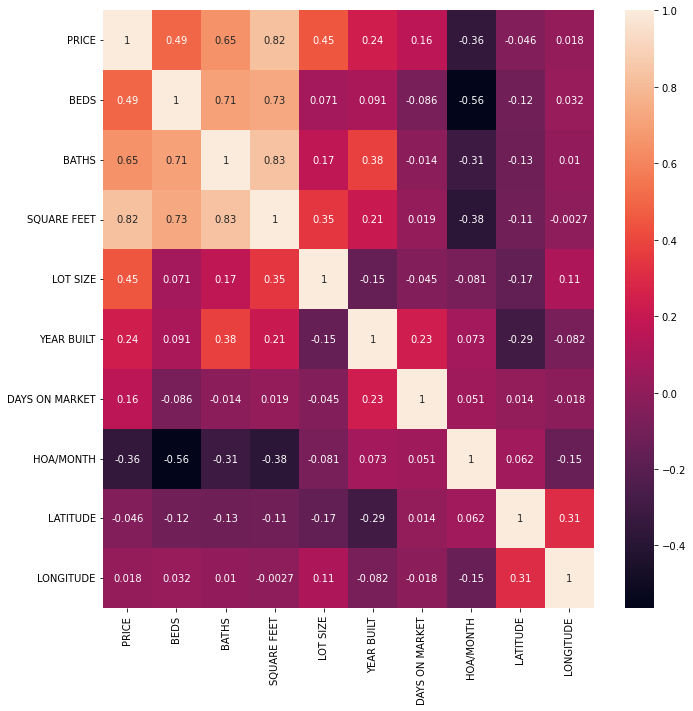

In [4]:
#heat map to spot possible correlation between variables
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

Take a closer look at possible positive correlation of price with: beds, bath, square feet, lot size, year built; and possible negative correlation with HOA/month.

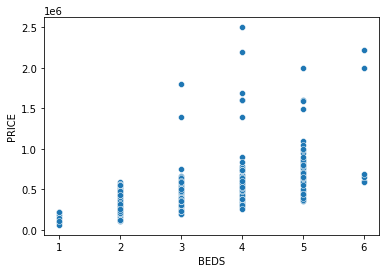

In [5]:
# price vs. number of bedrooms
sns.scatterplot(y='PRICE',x='BEDS',data=df)
plt.show()

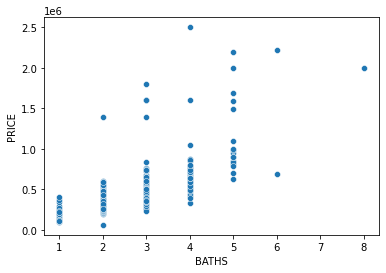

In [6]:
# price vs number of bathrooms
sns.scatterplot(y='PRICE',x='BATHS',data=df)
plt.show()

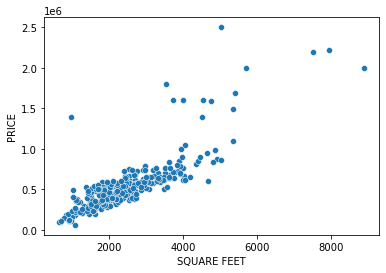

In [7]:
# price vs square footage
sns.scatterplot(y='PRICE',x='SQUARE FEET',data=df)
        
plt.show()

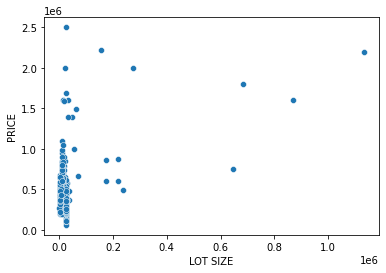

In [8]:
# price vs lot size
sns.scatterplot(y='PRICE',x='LOT SIZE',data=df)
plt.show()

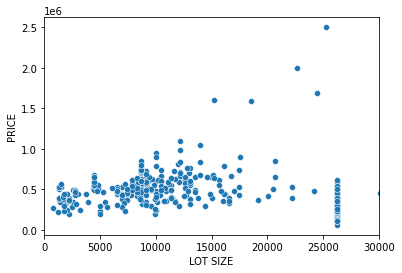

In [9]:
#focus on lot size less than 30000
sns.scatterplot(y='PRICE',x='LOT SIZE',data=df)
plt.xlim(0,30000)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

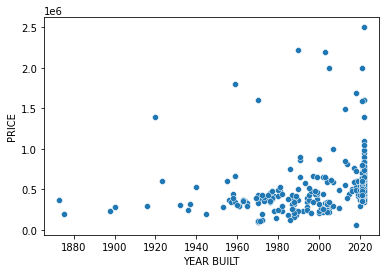

In [10]:
# price vs year built
sns.scatterplot(y='PRICE',x='YEAR BUILT',data=df)
plt.show

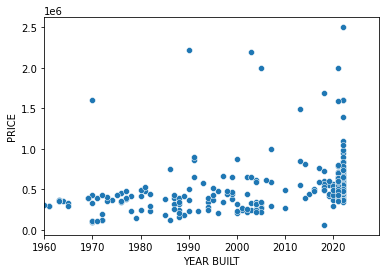

In [11]:
#focus on houses built since 1960
sns.scatterplot(y='PRICE',x='YEAR BUILT',data=df)
plt.xlim(1960,None)
plt.show()

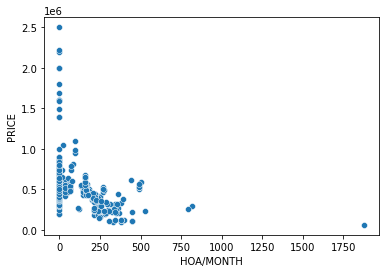

In [12]:
# price vs HOA fees/month
sns.scatterplot(y='PRICE',x='HOA/MONTH',data=df)
plt.show()

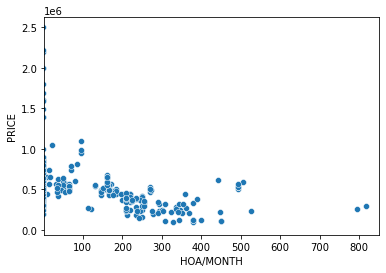

In [13]:
#focus only on homes with HOA, leave out outlier with large fee
sns.scatterplot(y='PRICE',x='HOA/MONTH',data=df)
plt.xlim(2,850)
plt.show()

Encode a variable for HOA (0=No HOA,1= Yes HOA)

In [14]:
# HOA encoding
HOA = [0 for i in range(len(df['HOA/MONTH']))]
for i in range(len(df['HOA/MONTH'])):
    if df['HOA/MONTH'][i]>0:
        HOA[i] = 1
    else:
        HOA[i] = 0
df['HOA']=HOA

Examine categorical variable relationship to price: HOA (Y/N), City, Property Type

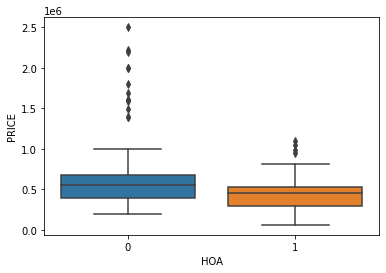

In [15]:
#price vs HOA (no HOA =0, yes HOA =1 
hoaplot = sns.boxplot(x='HOA',y='PRICE',data=df)

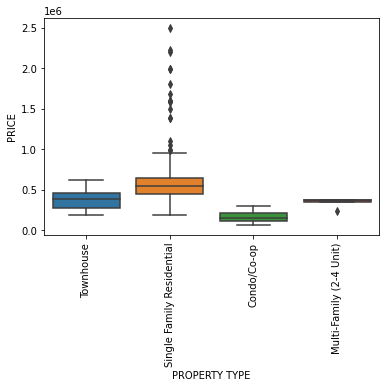

In [16]:
#price vs property type
typeplot = sns.boxplot(x='PROPERTY TYPE',y='PRICE',data=df)
plt.setp(typeplot.get_xticklabels(),rotation=90);

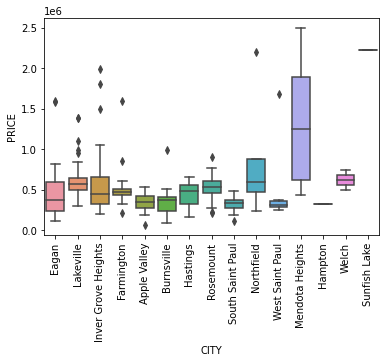

In [17]:
# price vs City
cityplot = sns.boxplot(x='CITY',y='PRICE',data=df)
plt.setp(cityplot.get_xticklabels(), rotation=90);